In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score


In [2]:
data = pd.read_csv('../Files tcc/data.csv',index_col=['Data'])

In [3]:
data.head()

,Fechamento
Data,
01-01-2015,314.25
02-01-2015,315.03
03-01-2015,281.08
04-01-2015,264.20
05-01-2015,274.47


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

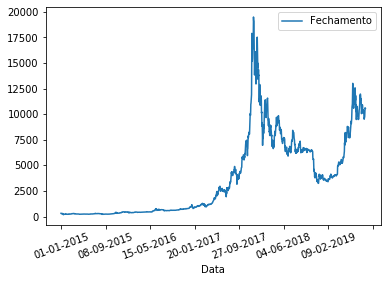

In [16]:
data.plot()
plt.xticks(rotation=20)

In [5]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')

In [6]:
train_size = int(len(dataset)*0.67)
teste_size = len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))

1145 564


In [7]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [8]:
def antes(dataset,look_back=1):
    dia_atras = []
    for i in range(len(dataset)-look_back-1):
        dia_atras.append(dataset[i-1+look_back, 0])
    
    return np.array(dia_atras)

In [9]:
look_back=3
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test,look_back=look_back)
dia_atras = antes(test,look_back=look_back)
print(len(trainX),len(trainY),len(testX),len(testY),len(dia_atras))

1141 1141 560 560 560


In [10]:
escalonador = StandardScaler()
trainX = escalonador.fit_transform(trainX)
testX = escalonador.transform(testX)

In [11]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(trainX, trainY)
predicao = regressor.predict(testX)

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
resultado = pd.DataFrame(testY,columns=['Esperado'])
resultado['Predito'] = predicao
resultado.index = data.tail(560).index

Regressao Linear
MAPE: 95.577
Desvio: 4.423
MSE: 201259.271
RMSE: 448.619
MAE: 308.497
MSLE: 0.003
R2 score: 96.385
Explaine Variance Score: 96.775


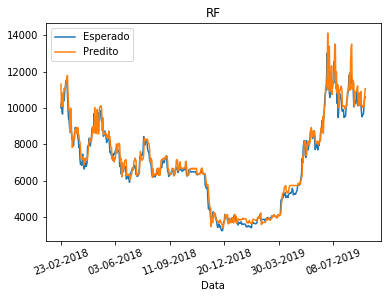

In [14]:
print('Regressao Linear')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,predicao)))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,predicao))
print("MSE: %.3f"%mean_squared_error(testY,predicao))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,predicao)))
print("MAE: %.3f"%mean_absolute_error(testY,predicao))
print("MSLE: %.3f"%mean_squared_log_error(testY,predicao))
print("R2 score: %.3f"%(r2_score(testY,predicao)*100))
print("Explaine Variance Score: %.3f"%(explained_variance_score(testY,predicao)*100))
resultado.plot()
plt.xticks(rotation=20)
plt.title('RF')
plt.savefig('RF_teste.png')

Predição de um dia em especifico
MAPE: -46.620
Desvio: 146.620
RMSE: 10885.473
Fechamento [7424.29]
Predito [18309.76300879]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

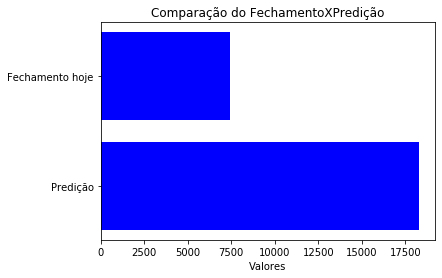

In [18]:
entrada = np.array([[7463.11,7761.24,7569.63]])
fechamentohoje = [7424.29]
predicaohoje = regressor.predict(entrada)
print("Predição de um dia em especifico")
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje)

vetorgrafico = { "Predição": predicaohoje[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')